In [124]:
from qiskit import *
from qiskit.ignis.verification import marginal_counts
import matplotlib.pyplot as plt
%matplotlib inline

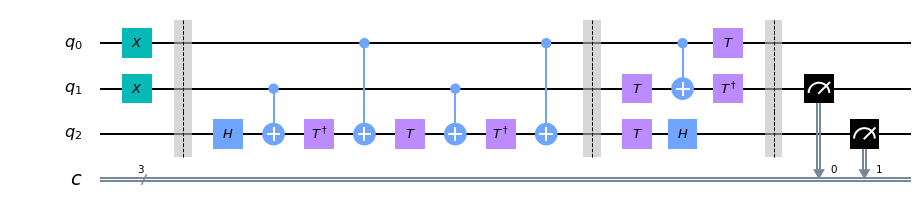

In [140]:
#input 1+1, expected 10 = 2
circuit = QuantumCircuit(3, 3)

circuit.x(0)
circuit.x(1)
circuit.barrier()

circuit.h(2)
circuit.cx(1,2)
circuit.tdg(2)
circuit.cx(0,2)
circuit.t(2)
circuit.cx(1,2)

circuit.tdg(2)

circuit.cx(0,2)

circuit.barrier()

circuit.t(1)
circuit.t(2)

circuit.cx(0,1)
circuit.h(2)
circuit.t(0)
circuit.tdg(1)

circuit.barrier()

circuit.measure([1,2], [0,1])

circuit.draw(output="mpl")

{'10': 1024}


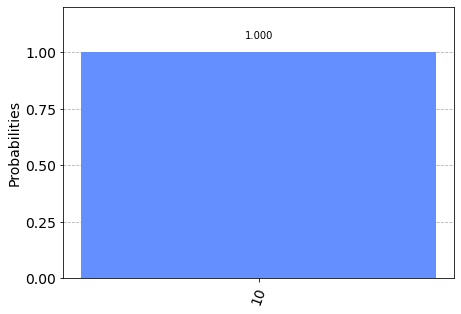

In [141]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots= 1024).result()

counts = marginal_counts(result.get_counts(circuit), [0, 1])
print(counts)

plot_histogram(counts)

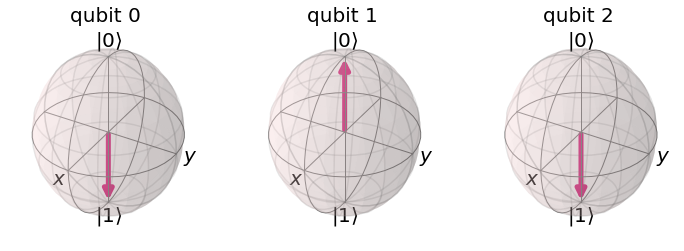

In [142]:
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")
sim_state_vector = qiskit.execute(circuit, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(sim_state_vector)